In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.pipeline import Pipeline

# 01. Introduction to the dataset and objectives of the exercise

**Dataset name:**  
Vehicle Fuel Economy

**Dataset source:**  
[Kaggle](https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy/data)  

**Dataset Description:**  
This dataset contains detailed information about vehicles, focusing on engine specifications and carbon dioxide (CO₂) emissions.  

**Objectives of the Exercise:**  
- Perform a basic analysis to understand the dataset and prepare it for modeling.  
- Build and evaluate linear regression models to predict CO₂ emissions based on vehicle specifications.  


In [2]:
"""
Download dataset from local files (for Google Colab)
"""
from google.colab import files
uploaded = files.upload()
!ls

Saving fuel.csv to fuel.csv
fuel.csv  sample_data


In [29]:
fuel_df = pd.read_csv('fuel.csv')
#pd.set_option('display.max_columns', None) can be uncommented to display all columns
fuel_df.head()

/tmp/ipython-input-3179616007.py:1: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_df = pd.read_csv('fuel.csv')


,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


**Note:**  
The dataset is quite large, containing 81 variables with detailed information about vehicles, such as manufacturer, vehicle class, engine specifications, and fuel details.  

The target variable candidates are:  
- `tailpipe_co2_in_grams_mile_ft1`  
- `tailpipe_co2_in_grams_mile_ft2`  

These variables represent the CO₂ emissions per mile (in grams) from the vehicle’s tailpipes.  
Some cars have two tailpipes because they can use two different types of fuel.


In [4]:
fuel_df.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'fuel_type_1', 'fuel_type_2',
       'city_mpg_ft1', 'unrounded_city_mpg_ft1', 'city_mpg_ft2',
       'unrounded_city_mpg_ft2', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'unrounded_highway_mpg_ft1', 'highway_mpg_ft2',
       'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'unadjusted_city_mpg_ft1', 'unadjusted_highway_mpg_ft1',
       'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2',
       'combined_mpg_ft1', 'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
       'unrounded_combined_mpg_ft2', 'combined_electricity_consumption',
       'combined_gasoline_consumption_cd

In [5]:
numerical_columns = ['year', 'engine_index', 'engine_cylinders', 'engine_displacement', 'city_mpg_ft1',
                     'unrounded_city_mpg_ft1',	'city_mpg_ft2',	'unrounded_city_mpg_ft2',	'city_gasoline_consumption_cd',
                     'city_electricity_consumption',	'city_utility_factor',	'highway_mpg_ft1',	'unrounded_highway_mpg_ft1',
                     'highway_mpg_ft2',	'unrounded_highway_mpg_ft2',	'highway_gasoline_consumption_cd',	'highway_electricity_consumption',
                     'highway_utility_factor',	'unadjusted_city_mpg_ft1',	'unadjusted_highway_mpg_ft1',	'unadjusted_city_mpg_ft2',
                     'unadjusted_highway_mpg_ft2',	'combined_mpg_ft1',	'unrounded_combined_mpg_ft1',	'combined_mpg_ft2',
                     'unrounded_combined_mpg_ft2',	'combined_electricity_consumption',	'combined_gasoline_consumption_cd',
                     'combined_utility_factor',	'annual_fuel_cost_ft1',	'annual_fuel_cost_ft2', 'save_or_spend_5_year',
                     'annual_consumption_in_barrels_ft1',	'annual_consumption_in_barrels_ft2',	'tailpipe_co2_ft1',
                     'tailpipe_co2_in_grams_mile_ft1',	'tailpipe_co2_ft2',	'tailpipe_co2_in_grams_mile_ft2',	'fuel_economy_score',
                     'ghg_score',	'ghg_score_alt_fuel', 'x2d_passenger_volume', 'x2d_luggage_volume',	'x4d_passenger_volume',
                     'x4d_luggage_volume',	'hatchback_passenger_volume',	'hatchback_luggage_volume', 'hours_to_charge_120v',
                     'hours_to_charge_240v',	'hours_to_charge_ac_240v',	'composite_city_mpg',	'composite_highway_mpg',
                     'composite_combined_mpg',	'range_ft1',	'city_range_ft1',	'highway_range_ft1',
                     'city_range_ft2',	'highway_range_ft2'
                     ]
fuel_df[numerical_columns].describe()

,year,engine_index,engine_cylinders,engine_displacement,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,city_electricity_consumption,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
count,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,...,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000
mean,2000.194527,8799.389001,5.736656,3.317583,17.981109,4.606426,0.546218,0.386633,0.000432,0.205802,...,0.027635,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,0.043973,0.040051
std,10.464573,17781.058490,1.752254,1.361995,6.849728,10.113963,4.109282,3.861179,0.039976,3.043951,...,0.473685,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,1.311628,1.169281
min,1984.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,0.000000,4.000000,2.200000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2001.000000,212.000000,6.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,4451.000000,6.000000,4.300000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,69102.000000,16.000000,8.400000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,12.000000,7.000000,97.000000,81.000000,88.000000,315.000000,305.900000,346.900000,103.030000,90.550000


**Note:** I identified the numerical variables in the dataset and reviewed their statistical summary values.  
Not all of the data is meaningful — for example, most vehicles use only one type of fuel, which is expected. As a result, the values of the `(...)_ft2` variables are mostly set to 0.

(array([1.390e+02, 1.600e+01, 6.500e+01, 3.280e+02, 2.215e+03, 5.073e+03,
        1.068e+04, 7.417e+03, 4.917e+03, 4.380e+03, 1.423e+03, 7.690e+02,
        4.680e+02, 1.360e+02, 0.000e+00, 4.700e+01, 0.000e+00, 3.500e+01,
        0.000e+00, 5.000e+00]),
 array([   0.        ,   63.47857145,  126.9571429 ,  190.43571435,
         253.9142858 ,  317.39285725,  380.8714287 ,  444.35000015,
         507.8285716 ,  571.30714305,  634.7857145 ,  698.26428595,
         761.7428574 ,  825.22142885,  888.7000003 ,  952.17857175,
        1015.6571432 , 1079.13571465, 1142.6142861 , 1206.09285755,
        1269.571429  ]),
 <BarContainer object of 20 artists>)

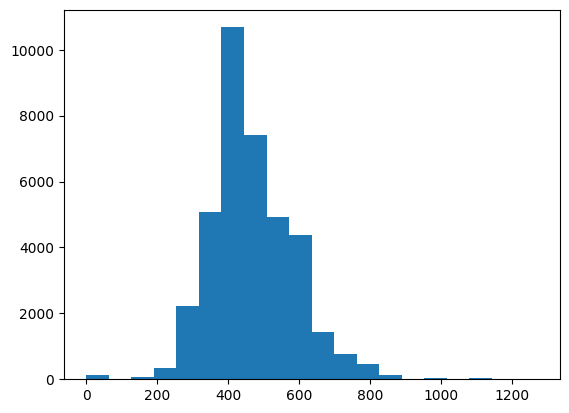

In [6]:
plt.hist(fuel_df['tailpipe_co2_in_grams_mile_ft1'], bins=20)

**Note:** I decided to set the target variable to `tailpipe_co2_in_grams_mile_ft1` because its values range from 0 to 1200, with a mean of around 472, which is good for modelling because it provides a wide and balanced distribution of values.

The `tailpipe_co2_in_grams_mile_ft2` variable mostly contains zeros up to the 3rd quartile, meaning that most cars have only one tailpipe (one type of fuel). Therefore, this variable is not useful for training the model.

In [7]:
co2_prediction_num_features = ['year', 'engine_cylinders', 'engine_displacement']

**Note:** After studying the variables, I decided to choose the numerical features shown above for training my model. This is mostly because I don't want variables that can be directly derived mathematically - I wanted to select data that represents only the car’s physical characteristics, without relying on any pre-calculated or previously studied values.


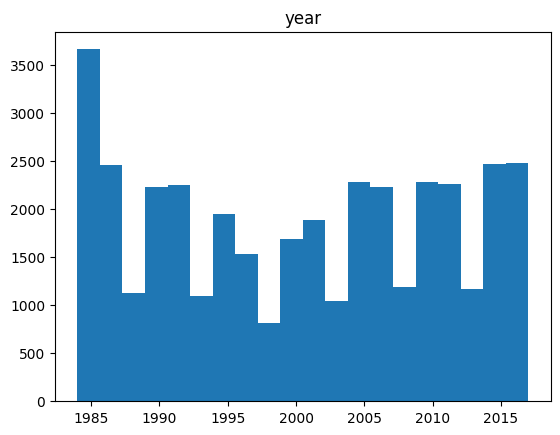

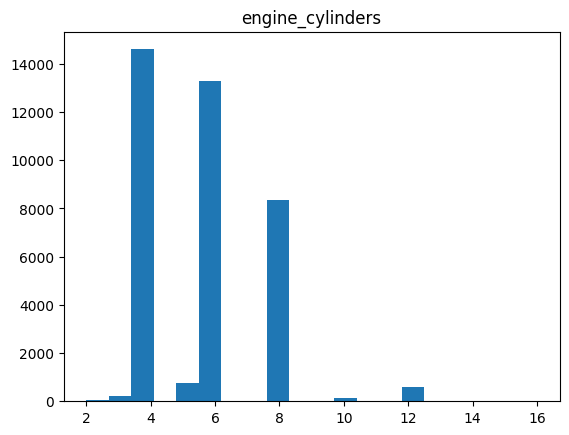

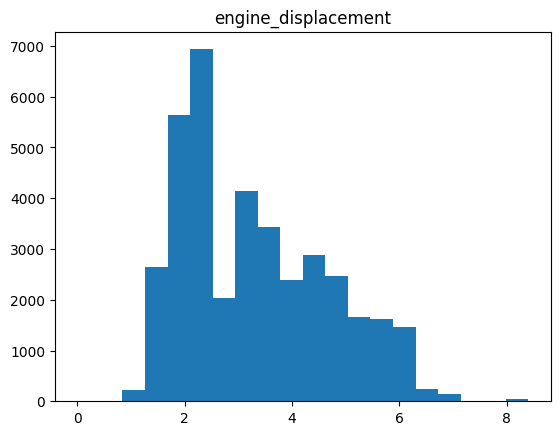

In [8]:
for col in co2_prediction_num_features:
  plt.hist(fuel_df[col], bins=20)
  plt.title(col)
  plt.show()

In [9]:
co2_prediction_cat_features = ['class', 'fuel_type_1', 'start_stop_technology', 'electric_motor', 'gasoline_electricity_blended_cd']

**Note:** Here I’ve chosen some categorical variables that I believe will be useful for identifying CO₂ emissions.


In [10]:
for col in co2_prediction_cat_features:
  print(f"Column name: {col}")
  print(f"Column type: {fuel_df[col].dtype}")
  print(fuel_df[col].unique())
  print("---")

Column name: class
Column type: object
['Minicompact Cars' 'Two Seaters' 'Special Purpose Vehicle 2WD'
 'Special Purpose Vehicle 4WD' 'Subcompact Cars' 'Midsize Cars'
 'Midsize Station Wagons' 'Compact Cars' 'Midsize-Large Station Wagons'
 'Large Cars' 'Small Station Wagons' 'Standard Pickup Trucks 2WD'
 'Vans, Passenger Type' 'Vans, Cargo Type' 'Standard Pickup Trucks 4WD'
 'Special Purpose Vehicles' 'Small Pickup Trucks 2WD'
 'Small Pickup Trucks 4WD' 'Vans' 'Standard Pickup Trucks'
 'Small Pickup Trucks' 'Vans Passenger' 'Standard Pickup Trucks/2wd'
 'Special Purpose Vehicles/2wd' 'Special Purpose Vehicles/4wd'
 'Sport Utility Vehicle - 4WD' 'Sport Utility Vehicle - 2WD'
 'Minivan - 2WD' 'Minivan - 4WD' 'Special Purpose Vehicle'
 'Small Sport Utility Vehicle 4WD' 'Small Sport Utility Vehicle 2WD'
 'Standard Sport Utility Vehicle 4WD' 'Standard Sport Utility Vehicle 2WD']
---
Column name: fuel_type_1
Column type: object
['Regular Gasoline' 'Diesel' 'Premium Gasoline' 'Natural Gas'
 '

In [11]:
co2_prediction_cat_features.remove('start_stop_technology')
co2_prediction_cat_features.remove('electric_motor')

**Note:** Above, I checked the unique values within the chosen features - some of the variables had to be removed because they contained no values besides `NaN`.


In [12]:
co2_prediction_df = fuel_df[['vehicle_id'] + co2_prediction_cat_features + co2_prediction_num_features + ['tailpipe_co2_in_grams_mile_ft1']]
co2_prediction_df.set_index('vehicle_id', inplace=True)
co2_prediction_df.head()

,class,fuel_type_1,gasoline_electricity_blended_cd,year,engine_cylinders,engine_displacement,tailpipe_co2_in_grams_mile_ft1
vehicle_id,,,,,,,
26587,Minicompact Cars,Regular Gasoline,False,1984,6.0,2.5,444.350000
27705,Minicompact Cars,Regular Gasoline,False,1984,6.0,2.5,444.350000
26561,Two Seaters,Regular Gasoline,False,1984,4.0,2.0,423.190476
27681,Two Seaters,Regular Gasoline,False,1984,4.0,2.0,423.190476
27550,Special Purpose Vehicle 2WD,Regular Gasoline,False,1984,4.0,2.5,522.764706


**Note:** `co2_prediction_df` is a derived dataframe consisting only of the values that I've chosen before and will be useful for training my custom model.


In [13]:
co2_prediction_df[co2_prediction_num_features].corr()

,year,engine_cylinders,engine_displacement
year,1.000000,0.097356,0.054615
engine_cylinders,0.097356,1.000000,0.902913
engine_displacement,0.054615,0.902913,1.000000


**Note:** After checking the correlations between the numerical values of the created dataframe, I found that there are no high correlations, which is good because it reduces the risk of multicollinearity in the model.  

The only exception is the correlation between `engine_cylinders` and `engine_displacement`, which is quite high (0.9).  
However, I believe both variables are crucial, and since these are the only ones with a high correlation, I will keep them both.

In [14]:
num_values = pd.get_dummies(co2_prediction_df[co2_prediction_cat_features], drop_first=True, dtype=int)
co2_prediction_df.drop(co2_prediction_cat_features, axis=1, inplace=True)
co2_prediction_df = co2_prediction_df.join(num_values)
co2_prediction_df.head()

/tmp/ipython-input-2151859063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_prediction_df.drop(co2_prediction_cat_features, axis=1, inplace=True)


,year,engine_cylinders,engine_displacement,tailpipe_co2_in_grams_mile_ft1,gasoline_electricity_blended_cd,class_Large Cars,class_Midsize Cars,class_Midsize Station Wagons,class_Midsize-Large Station Wagons,class_Minicompact Cars,...,class_Two Seaters,class_Vans,class_Vans Passenger,"class_Vans, Cargo Type","class_Vans, Passenger Type",fuel_type_1_Electricity,fuel_type_1_Midgrade Gasoline,fuel_type_1_Natural Gas,fuel_type_1_Premium Gasoline,fuel_type_1_Regular Gasoline
vehicle_id,,,,,,,,,,,,,,,,,,,,,
26587,1984,6.0,2.5,444.350000,False,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
27705,1984,6.0,2.5,444.350000,False,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
26561,1984,4.0,2.0,423.190476,False,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
27681,1984,4.0,2.0,423.190476,False,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
27550,1984,4.0,2.5,522.764706,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Note:** Above, I performed the conversion of categorical variables into numerical ones using the `get_dummies()` function, which is crucial if we want to use them as features for the model.  
I also decided to drop one of the columns - it is because when model can directly predict one category based on the others it leads to multicollinearity, which we are trying to avoid.

In [15]:
print(co2_prediction_df.isnull().sum())
co2_prediction_df = co2_prediction_df.dropna()

year                                          0
engine_cylinders                            136
engine_displacement                         134
tailpipe_co2_in_grams_mile_ft1                0
gasoline_electricity_blended_cd               0
class_Large Cars                              0
class_Midsize Cars                            0
class_Midsize Station Wagons                  0
class_Midsize-Large Station Wagons            0
class_Minicompact Cars                        0
class_Minivan - 2WD                           0
class_Minivan - 4WD                           0
class_Small Pickup Trucks                     0
class_Small Pickup Trucks 2WD                 0
class_Small Pickup Trucks 4WD                 0
class_Small Sport Utility Vehicle 2WD         0
class_Small Sport Utility Vehicle 4WD         0
class_Small Station Wagons                    0
class_Special Purpose Vehicle                 0
class_Special Purpose Vehicle 2WD             0
class_Special Purpose Vehicle 4WD       

**Note:** And finally, I cleaned the dataset by dropping rows that contained empty values in any of the columns.


In [16]:
X = co2_prediction_df.drop('tailpipe_co2_in_grams_mile_ft1', axis=1)
y = co2_prediction_df['tailpipe_co2_in_grams_mile_ft1']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Note:** Because the feature values are on different scales — for example, engine cylinders range from 1 to 16, while year values are much larger — the dataset needed standard scaling. The transformation adjusted the data to have a mean of 0 and a standard deviation of 1, preventing the model from thinking one value is more influential than the other.


# 02. Creating a Linear Regression Model

I decided to try four different methods to find the best-performing model:

- **Basic Linear Regression** – using hand-selected features and testing different polynomial degrees. Then, I used **cross-validation** to evaluate the created model.  
- **Lasso Regression** – using all variables with L1 regularization to perform feature selection.  
- **Ridge Regression** – using all variables with L2 regularization to handle multicollinearity and improve generalization.  
- **Elastic Net** – to see if combining both Lasso and Ridge regularization is beneficial for the chosen dataset.

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
print("Model Performance on training set:")
print(f"R² Score: {r2_score(y_train, y_pred)}")
print(f"MSE: {(mean_squared_error(y_train, y_pred))}")

y_pred = model.predict(X_test_scaled)
print("Model Performance on test set:")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

Model Performance on training set:
R² Score: 0.7846886693045647
MSE: 3039.8896616911684
Model Performance on test set:
R² Score: 0.7814041115311314
MSE: 3175.1934649104132
RMSE: 56.34885504524838


**Note:** For the first linear regression model, we achieved an R² score of approximately 0.78, which is quite good. It means the model’s performance is above medium.  

The MSE score varies from 3039 to 3175 with the larger value on the test set — as expected.  
The RMSE is around 56.3, meaning that the predicted CO₂ values differ from the actual ones by about 56 units on average - this is an acceptable error, considering that CO₂ emission values range from about 0 to 1200.  
Therefore, the chosen features allow us to predict CO₂ emissions with reasonably good accuracy.

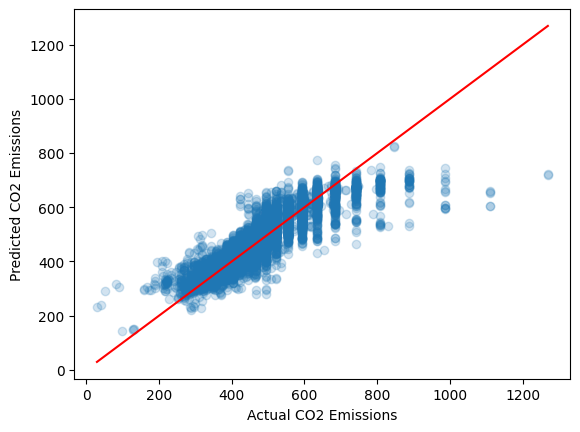

In [20]:
plt.scatter(y_test, y_pred, alpha=0.2)
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, color='red')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.show()

**Note:** Because of multiple features, to visualize the model, I used a slightly non-standard approach — the X-axis shows the actual CO₂ emissions, and the Y-axis shows the predicted values. If the points are fairly symmetrical and close to the red line (x=y), it means the predictions are very similar to the actual values.The less symmetrical the plot, the worse the predictions.

We can see that the model mostly struggled with extreme values — in those areas, the scatter is not symmetrical.


In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(r2_scores, mse_scores)

[0.78353271 0.77485007 0.79584253 0.78508156 0.78049091] [-2956.53419632 -3217.94675242 -2780.19763401 -2937.60162884
 -3370.22566335]


**Note:** Here, I used cross-validation to evaluate how well the model performs across different training and testing splits.  
This method helps to check the model’s stability and ensures that its performance is not just a result of a lucky data split.  
As we can see, out of the 5 folds, the values are quite similar which means that the model generalizes well across different data subsets and is not overly dependent on any specific split of the dataset.

In [22]:
for degree in range(2, 4):
    poly_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression())
    ])
    poly_pipeline.fit(X_train, y_train)
    y_pred = poly_pipeline.predict(X_test)
    print(f"Test errors for model with polynomial degree: {degree}")
    print(f"R2: {(r2_score(y_test, y_pred))}")
    print(f"MSE: {(mean_squared_error(y_test, y_pred))}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
    print("\n")

Test errors for model with polynomial degree: 2
R2: 0.8213107319434704
MSE: 2595.533704484659
RMSE: 50.94638068091451


Test errors for model with polynomial degree: 3
R2: 0.8468707579786118
MSE: 2224.2640150216794
RMSE: 47.16210358987054




**Note:** I decided to use the same features but with higher polynomial degrees to see if it improves the results.  
In our case — it did! However, I only tested the 2nd and 3rd degree polynomials because of the dataset size - the 3rd-degree model already took around 40 minutes and about 12 GB of RAM to process.  

I couldn’t test higher degrees, but I believe it wouldn’t be very helpful, since higher-degree polynomials tend to overfit beyond a certain point.


In [23]:
model = Lasso()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Test errors:")
print(f"R2: {(r2_score(y_test, y_pred))}")
print(f"MSE: {(mean_squared_error(y_test, y_pred))}")

Test errors:
R2: 0.7750631628979281
MSE: 3267.2983018426385


**Note:** Above, we can see the model created using the second method — **Lasso Regression**.  
Lasso is a type of linear regression that automatically analyzes all the variables in the dataset and selects the most valuable features on its own. It changes the coefficients in the linear equation — giving larger coefficients to more relevant variables and reducing or even completely "0-ing" those that seem to be useless.

The MSE and R² scores, however, are slightly worse than the custom models.

In [24]:
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs.sort_values(ascending=False, inplace=True)
print(coeffs.head)

<bound method NDFrame.head of engine_displacement                         55.985957
engine_cylinders                            33.243493
fuel_type_1_Premium Gasoline                28.878198
fuel_type_1_Regular Gasoline                22.508421
class_Sport Utility Vehicle - 4WD           12.420838
class_Special Purpose Vehicles              11.918268
class_Standard Pickup Trucks                11.230865
class_Standard Pickup Trucks 4WD             9.993938
class_Vans                                   8.808542
class_Vans, Passenger Type                   7.951527
class_Vans, Cargo Type                       6.404394
class_Standard Pickup Trucks 2WD             5.784241
class_Sport Utility Vehicle - 2WD            5.517479
class_Special Purpose Vehicle 2WD            5.371462
class_Special Purpose Vehicle 4WD            3.993976
class_Small Pickup Trucks 4WD                3.694919
class_Small Pickup Trucks 2WD                2.374300
class_Small Sport Utility Vehicle 4WD        1.94721

**Note:** Here we can see which variables Lasso selected. The most valuable feature is `engine_displacement`, with a coefficient of approximately 56. Most of the vehicle class variables were removed (coefficient = 0). The variable with the largest negative coefficient is `year` — which makes sense, as newer cars tend to be more "eco-friendly."


In [25]:
model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Test errors:")
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Test errors:
R2: 0.7814040464981498
MSE: 3175.1944095407066


In [26]:
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs.sort_values(ascending=False, inplace=True)
print(coeffs.head)

<bound method NDFrame.head of engine_displacement                         52.341272
fuel_type_1_Premium Gasoline                48.450482
fuel_type_1_Regular Gasoline                38.440749
engine_cylinders                            34.837354
class_Sport Utility Vehicle - 4WD           16.784515
class_Standard Pickup Trucks                16.206512
class_Special Purpose Vehicles              15.266028
class_Standard Pickup Trucks 4WD            13.879116
class_Vans                                  12.349450
class_Vans, Passenger Type                  10.724741
class_Standard Pickup Trucks 2WD             9.825949
class_Sport Utility Vehicle - 2WD            9.724936
class_Vans, Cargo Type                       9.362320
class_Special Purpose Vehicle 2WD            8.024693
class_Special Purpose Vehicle 4WD            6.132748
class_Small Pickup Trucks 4WD                6.089889
class_Small Pickup Trucks 2WD                5.136789
class_Small Sport Utility Vehicle 4WD        4.82809

**Note:** The Ridge model, however, tries to shrink all of the features rather than zeroing any coefficients - as we can see, it did not set any coefficients to zero. The ranking of the features and measured errors are similar to the Lasso model.

In [27]:
model = ElasticNetCV()
model.fit(X_train_scaled, y_train) # here fit works differently and uses cross validation automatically
y_pred = model.predict(X_test_scaled)
print("Test errors:")
print(f"R2: {(r2_score(y_test, y_pred))}")
print(f"MSE: {(mean_squared_error(y_test, y_pred))}")

Test errors:
R2: 0.7706983030856208
MSE: 3330.699651467116


**Note:** Finally - Elastic Net - which combines the Lasso and Ridge approaches.
The R² is a tiny bit lower than in the previous models so it is not better, however, it still allows us to gain some valuable insights - the Ridge-only model has better validation values than Elastic Net, indicating that Ridge performs better than Lasso for this dataset, which can be because as we explored at the beggining the dataset likely contains many correlated features, in which one can be caluclated based on another.


**Note:** To conclude, the best model was the custom Linear Regression with a polynomial degree of 3.  
Its performance metrics were:

- **R²:** 0.8469  
- **MSE:** 2224.26  
- **RMSE:** 47.16  

These results show that the model fits the data well and gives the most accurate predictions among all tested approaches, with an average error of approximately ±47 CO₂ units.


